# Examples of data analysis and visualisation packages in use

# Graeme Hawker, University of Strathclyde, 14th November 2017 

## Creating a Dataframe and basic visualisation

Using the pandas library (http://pandas.pydata.org), we can handle large multi-dimensional datasets. Here we create a new DataFrame object and fill it with random datapoints, perform some calculations on those values, produce a scatterplot using the Seaborn library (http://seaborn.pydata.org/tutorial.html) and then perform a regression analysis on the data using the statsmodels library (http://statsmodels.sourceforge.net/).

In [1]:
import pandas as pd
import random

#create empty DataFrame object
df = pd.DataFrame()

#create 2 lists of 25 random numbers from 1-100 and set these as columns of the DataFrame
df['x'] = random.sample(range(1,100), 25)
df['y'] = random.sample(range(1,100), 25)

#show the first 5 rows of the DataFrame
df.head()

,x,y
0,75,53
1,28,58
2,8,57
3,62,86
4,92,80


In [2]:
#show the totals of each column
df.sum()

x    1555
y    1350
dtype: int64

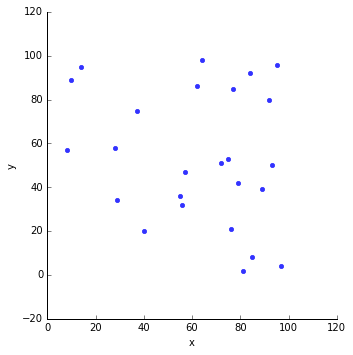

In [4]:
#import seaborn library for plotting
import seaborn as sns
%matplotlib inline

#show a scatterplot of the datapoints
sns.lmplot('x','y', data=df, fit_reg=False)

In [5]:
#fit regression model to the data and analyse results
import statsmodels.formula.api as sm
model = sm.OLS(df['y'],df['x'])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     32.61
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           6.97e-06
Time:                        12:04:50   Log-Likelihood:                -127.82
No. Observations:                  25   AIC:                             257.6
Df Residuals:                      24   BIC:                             258.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.6898      0.121      5.711      0.0

## Importing data and advanced visualisation

Here we import external data (a csv file containing a time-series of simultaneous wind and power measurements from a wind turbine) into a DataFrame, and then use the Seaborn library (http://seaborn.pydata.org/tutorial.html) to create a joint distribution plot for statistical interpretation of the data.

In [6]:
#import data from file
turbine_data = pd.read_csv('power_curve_data.csv', index_col=0, parse_dates=True)

#show first 5 rows
turbine_data.head()

,Windspeed,Power
Timestamp,,
2010-01-01 00:00:00,8.21859,0.527433
2010-01-01 00:10:00,10.07550,0.698405
2010-01-01 00:20:00,10.18490,0.642705
2010-01-01 00:30:00,8.56266,0.534949
2010-01-01 00:40:00,8.93533,0.394143


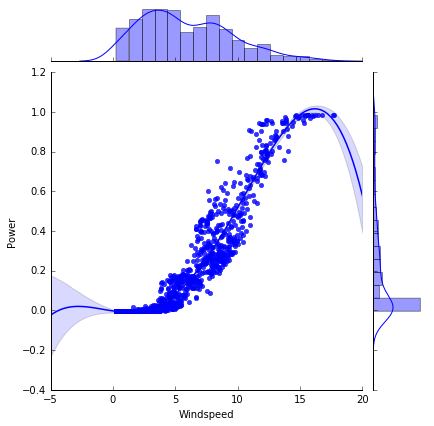

In [7]:
#create joint frequency distribution plot with marginals and fitted polynomial
g = sns.JointGrid('Windspeed','Power', data=turbine_data)
g.plot_joint(sns.regplot, order=4)
g.plot_marginals(sns.distplot)

## Using an API: Searching for a location on Google Maps

The Google Maps API available at https://code.google.com/apis/console gives details of web services we can access from which we can request data. (note that to do so you need to have an API key, which Google provides for free to registered developers)

While we could manually write code to access this API from Python by creating http requests and handling the returned data, there are various Python packages which give us easy to use methods to access the Google Maps API in a short amount of code. In this example we use the googlemaps package at https://pypi.python.org/pypi/googlemaps/. (to install this simply enter 'pip install googlemaps' on the command line or terminal of your operating system)

For example, to find the grid coordinates of the University, we create a local Python object which can manage the connections using our API key. We then search for the University, and Google returns a list of locations which match our search, and we print out the returned dictionary of values:

In [9]:
import googlemaps
gmaps = googlemaps.Client(key='insert_your_api_key_here')
geocode_result = gmaps.geocode('University of Strathclyde')
print(geocode_result)

[{u'geometry': {u'location': {u'lat': 55.8628285, u'lng': -4.2428535}, u'viewport': {u'northeast': {u'lat': 55.8641774802915, u'lng': -4.241504519708498}, u'southwest': {u'lat': 55.8614795197085, u'lng': -4.244202480291502}}, u'location_type': u'ROOFTOP'}, u'address_components': [{u'long_name': u'16', u'types': [u'street_number'], u'short_name': u'16'}, {u'long_name': u'Richmond Street', u'types': [u'route'], u'short_name': u'Richmond St'}, {u'long_name': u'Glasgow', u'types': [u'postal_town'], u'short_name': u'Glasgow'}, {u'long_name': u'Glasgow City', u'types': [u'administrative_area_level_2', u'political'], u'short_name': u'Glasgow City'}, {u'long_name': u'Scotland', u'types': [u'administrative_area_level_1', u'political'], u'short_name': u'Scotland'}, {u'long_name': u'United Kingdom', u'types': [u'country', u'political'], u'short_name': u'GB'}, {u'long_name': u'G1 1XQ', u'types': [u'postal_code'], u'short_name': u'G1 1XQ'}], u'place_id': u'ChIJtaRY9h1EiEgRvq3jwDM9FGA', u'formatted_

## GIS: Displaying data on a map

This example uses the Basemap library (http://matplotlib.org/basemap/) for plotting geographical data on a map. 

Note that to make this example work under python 3.x and Anaconda on Windows, you will need to install the BaseMap library by entering the following commands at the command-line:

conda install -c conda-forge basemap=1.0.8.dev0

conda install -c conda-forge basemap-data-hires

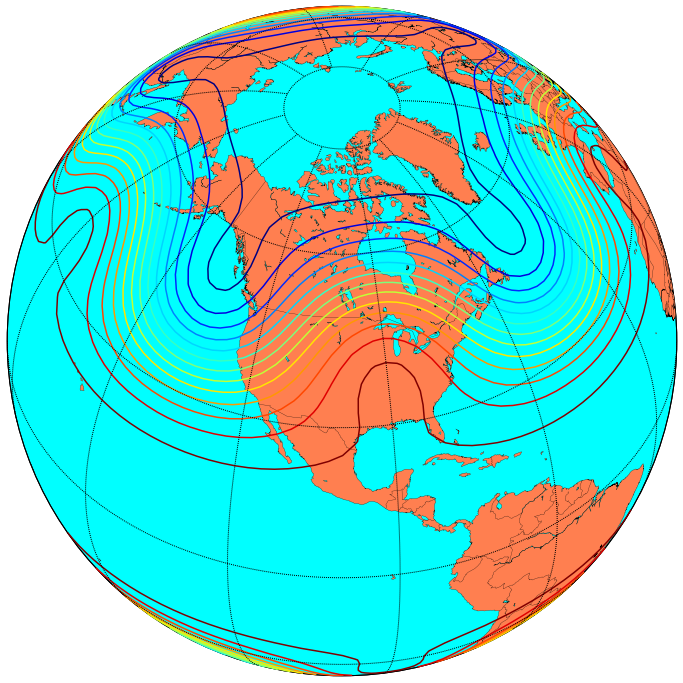

In [25]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
plt.figure(figsize=(12,12))
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)

# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)

# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.show()